In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree


from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [81]:
df = pd.read_csv('https://raw.githubusercontent.com/ds-mahbub/24MLE01_Machine-Learning-Engineer/KNN/Classification/data/heart_disease.csv')

df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [82]:
print(df.isna().sum())

print('...................')

print(f'Duplicate Value: {df.duplicated().sum()}')

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64
...................
Duplicate Value: 18078


In [83]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [84]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [85]:
df = df[df.columns].replace(
    {
        'Yes': 1,
        'No': 0,
        'Male': 1,
        'Female': 0,
        'Yes (during pregnancy)': 1,
        'No, borderline diabetes': 0

        }

    )

In [86]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,55-59,White,1,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80 or older,White,0,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,65-69,White,1,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,75-79,White,0,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,40-44,White,0,1,Very good,8.0,0,0,0


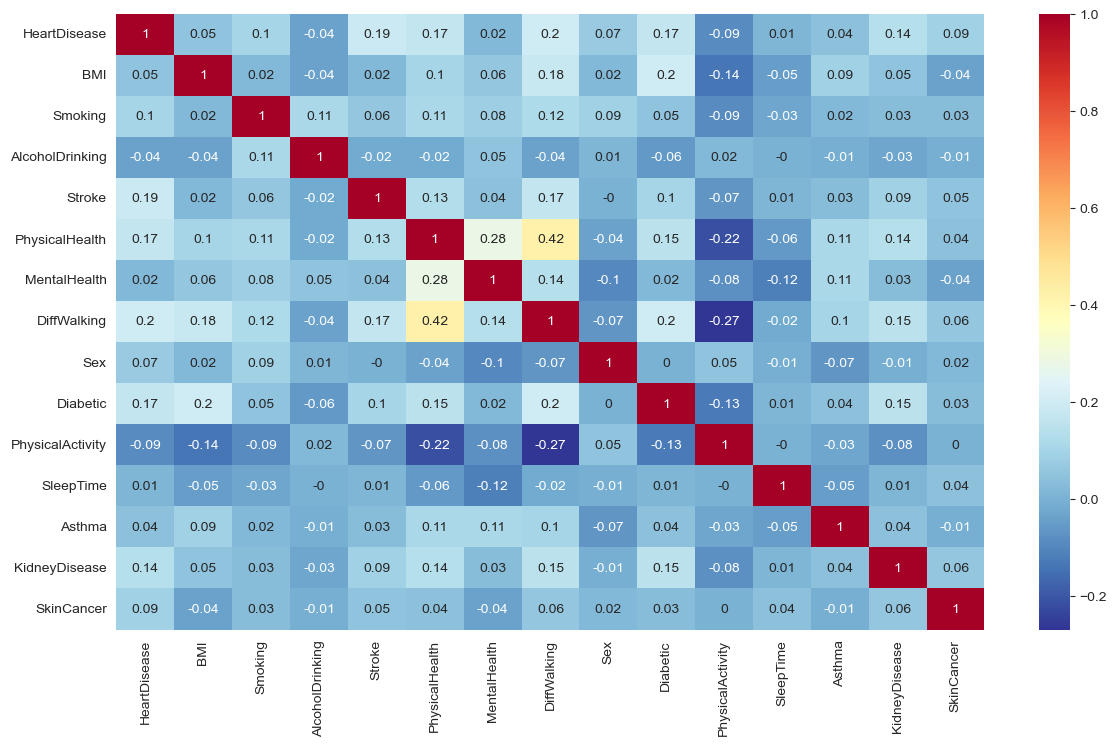

In [87]:
new_df = df.drop(columns=['AgeCategory', 'Race', 'GenHealth'])
corr = new_df.corr().round(2)

plt.figure(figsize=(14,8))
sns.heatmap(corr, annot=True, cmap='RdYlBu_r')
plt.show()

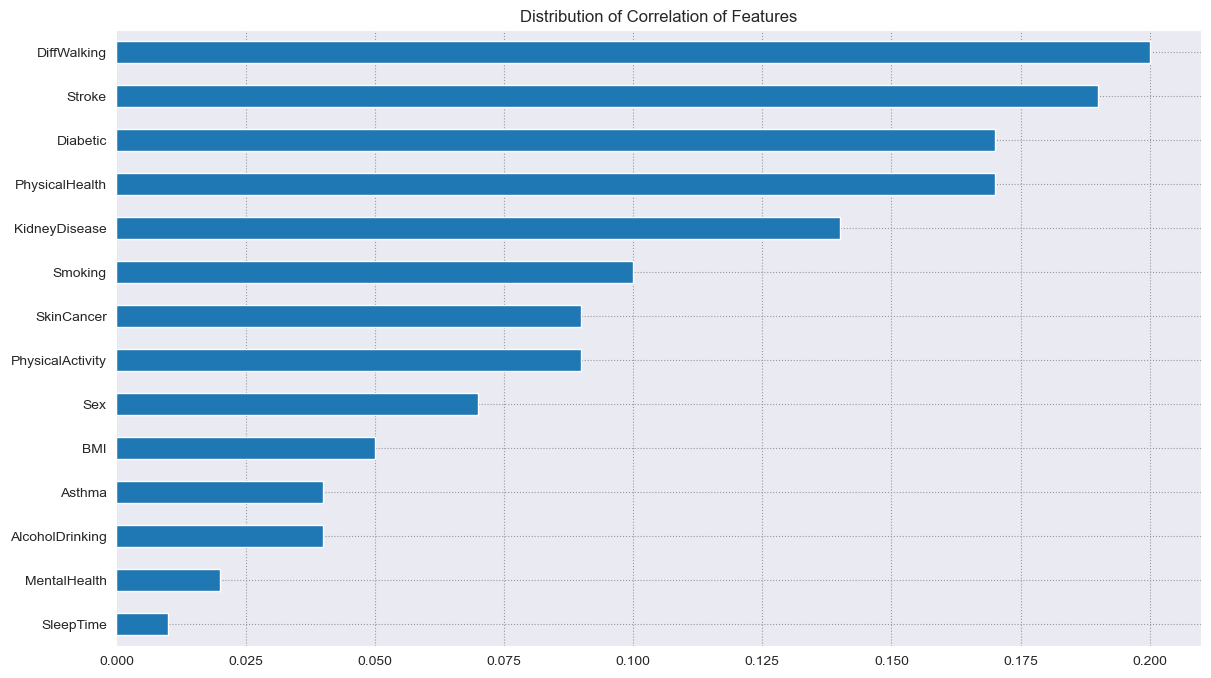

In [88]:
sns.set_style('darkgrid', {'grid.color': '.6', 'grid.linestyle': ':'})
sns.color_palette('magma', as_cmap=True)
plt.figure(figsize=(14,8))
plt.title('Distribution of Correlation of Features')
abs(corr['HeartDisease']).sort_values()[:-1].plot.barh()
plt.show()

In [89]:
X = df.drop('HeartDisease', axis = 1)
y = df['HeartDisease']

In [90]:
df.dtypes

HeartDisease          int64
BMI                 float64
Smoking               int64
AlcoholDrinking       int64
Stroke                int64
PhysicalHealth      float64
MentalHealth        float64
DiffWalking           int64
Sex                   int64
AgeCategory          object
Race                 object
Diabetic              int64
PhysicalActivity      int64
GenHealth            object
SleepTime           float64
Asthma                int64
KidneyDisease         int64
SkinCancer            int64
dtype: object

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = True, test_size = .25, random_state=42)
print(f'Shape of Train Data: {X_train.shape}\nShape of Test Data: {X_test.shape}\nShape of Training Class: {y_train.shape}\nShape of Testing Class: {y_test.shape}')

Shape of Train Data: (226287, 17)
Shape of Test Data: (75430, 17)
Shape of Training Class: (226287,)
Shape of Testing Class: (75430,)


In [92]:
transformer = make_column_transformer(
    (OneHotEncoder(), ['AgeCategory', 'Race', 'GenHealth']), remainder='passthrough'
    )

# transforming train data
X_train_transformed = transformer.fit_transform(X_train)
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=transformer.get_feature_names_out())

# transforming train data
X_test_transformed = transformer.transform(X_test)
X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=transformer.get_feature_names_out())



In [93]:
X_train = pd.concat([X_train_transformed_df, X_train.reset_index(drop=True)], axis = 1)

X_test = pd.concat([X_test_transformed_df, X_test.reset_index(drop=True)], axis = 1)

In [94]:
X_train.drop(['AgeCategory', 'Race', 'GenHealth', 'Sex', 'BMI', 'Asthma', 'AlcoholDrinking','MentalHealth', 'SleepTime', 'PhysicalActivity'], axis=1, inplace=True)

X_test.drop(['AgeCategory', 'Race', 'GenHealth', 'Sex', 'BMI', 'Asthma', 'AlcoholDrinking','MentalHealth', 'SleepTime', 'PhysicalActivity'], axis=1, inplace=True)

In [69]:
X_train.shape

(226287, 46)

In [70]:
# Data Modeling

def model_evaluation(estimator, x_test, y_test):

    from sklearn import metrics

    y_pred = estimator.predict(x_test)

    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    #AUC
    y_pred_probability = estimator.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_probability)
    auc = metrics.roc_auc_score(y_test, y_pred_probability)
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'f1': f1,
        'kappa': kappa,
        'fpr': fpr,
        'tpr': tpr,
        'auc': auc,
        'cm': cm
        }

In [71]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)
knn_eval = model_evaluation(knn, X_test, y_test)
print('Accuracy: ', knn_eval['accuracy'])
print('Precision: ', knn_eval['precision'])
print('Recall: ', knn_eval['recall'])
print('f1_score', knn_eval['f1'])
print('Cohens Kappa Score: ', knn_eval['kappa'])
print('Area Under Curve: ', knn_eval['auc'])

Accuracy:  0.9054222457907994
Precision:  0.33822091886608013
Recall:  0.050859914743495514
f1_score 0.08842320470227447
Cohens Kappa Score:  0.06641025601967765
Area Under Curve:  0.6896886819637714


In [72]:
y_pred = knn.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[67950,   677],
       [ 6457,   346]], dtype=int64)

HyperParameter Tuning for KNN

In [79]:
# choosing optimum k using random int

neighbors = np.arange(3, 18)

train_accuracy = {}
test_accuracy = {}

for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    
    train_accuracy[n] = knn.score(X_train, y_train)
    test_accuracy[n] = knn.score(X_test, y_test)

print("Train Accuracy: ", train_accuracy)
print("Test Accuracy: ", test_accuracy)


KeyboardInterrupt: 

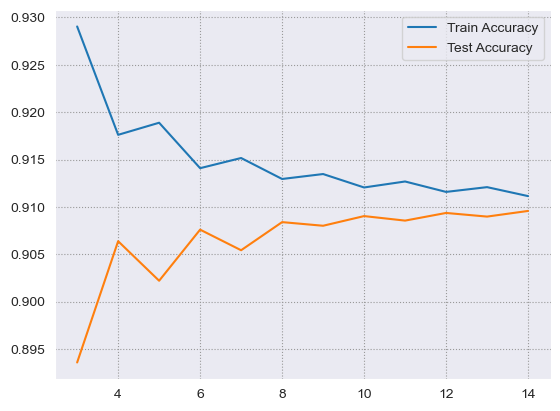

In [74]:
plt.plot(neighbors, train_accuracy.values(), label = "Train Accuracy")
plt.plot(neighbors, test_accuracy.values(), label = 'Test Accuracy')
plt.legend()
plt.show()

In [75]:
knn = KNeighborsClassifier(n_neighbors = 14)
knn.fit(X_train, y_train)

knn_eval = model_evaluation(knn, X_test, y_test)
print('Accuracy: ', knn_eval['accuracy'])
print('Precision: ', knn_eval['precision'])
print('Recall: ', knn_eval['recall'])
print('f1_score', knn_eval['f1'])
print('Cohens Kappa Score: ', knn_eval['kappa'])
print('Area Under Curve: ', knn_eval['auc'])

Accuracy:  0.9095717884130983
Precision:  0.4608695652173913
Recall:  0.015581361164192268
f1_score 0.030143608701834208
Cohens Kappa Score:  0.024388540557526484
Area Under Curve:  0.7308870720551555


In [76]:
y_pred = knn.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[68503,   124],
       [ 6697,   106]], dtype=int64)

In [77]:
knn.score(X_train, y_train)

0.911139393778697

In [78]:
knn.score(X_test, y_test)

0.9095717884130983

In [25]:
# Hyperparameter Tuning with GridSearchCV

from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidian', 'manhattan']
    }

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_param = grid_search.best_params_
print(best_param)

{'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'uniform'}


In [29]:
knn = KNeighborsClassifier(metric= 'manhattan', n_neighbors= 15, weights='uniform')
knn.fit(X_train, y_train)

knn_eval = model_evaluation(knn, X_test, y_test)
print('Accuracy: ', knn_eval['accuracy'])
print('Precision: ', knn_eval['precision'])
print('Recall: ', knn_eval['recall'])
print('f1_score', knn_eval['f1'])
print('Cohens Kappa Score: ', knn_eval['kappa'])
print('Area Under Curve: ', knn_eval['auc'])

Accuracy:  0.909823677581864
Precision:  0.5016077170418006
Recall:  0.022931059826547112
f1_score 0.04385718301939837
Cohens Kappa Score:  0.03625752786714975
Area Under Curve:  0.7334185718599155


In [30]:
y_pred = knn.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[68472,   155],
       [ 6647,   156]], dtype=int64)